<span style="color: rgb(226, 229, 233); font-family: &quot;Segoe UI Historic&quot;, &quot;Segoe UI&quot;, Helvetica, Arial, sans-serif; font-size: 15px; white-space-collapse: preserve; background-color: rgb(48, 48, 48);">A SZOBA tábla KLIMA oszlopára határozzuk meg: NULL értékek száma, nem NULL értékek száma, minden nem NULL érték előfordulási aránya százalékban (egy sorban, aggregáltan)</span>

In [ ]:
SELECT
  COUNT(KLIMAS) AS 'Nem null',
  SUM(CASE WHEN KLIMAS is null THEN 1 ELSE 0 END) AS 'Null',
  100*(COUNT(KLIMAS)/SUM(CASE WHEN KLIMAS is null THEN 1 ELSE 0 END)) AS 'arány'
FROM SZOBA;


<span style="color: rgb(226, 229, 233); font-family: &quot;Segoe UI Historic&quot;, &quot;Segoe UI&quot;, Helvetica, Arial, sans-serif; font-size: 15px; white-space-collapse: preserve; background-color: rgb(48, 48, 48);">Listázzuk minden vendég USERNEV és NEV adatait, és jelenítsük meg: hogy hányszor foglaltak, az összes vendég közül hányadik legtöbbet foglaltak (RANK). Csak azokat vegyük figyelembe, akik legalább kétszer foglaltak</span>

In [ ]:
select USERNEV, NEV, 
    COUNT(USERNEV) as 'hanyszor',
    RANK() OVER (ORDER BY COUNT(USERNEV) DESC) AS 'rangsor'
from Vendeg v join Foglalas f on v.USERNEV=f.UGYFEL_FK
group by USERNEV, NEV
HAVING COUNT(USERNEV)>2

<span style="color: rgb(226, 229, 233); font-family: &quot;Segoe UI Historic&quot;, &quot;Segoe UI&quot;, Helvetica, Arial, sans-serif; font-size: 15px; white-space-collapse: preserve; background-color: rgb(48, 48, 48);">Listázzuk a foglalások számát szálláshelyenként és pótágyak száma szerint, valamint részösszegeket is!</span>

In [ ]:
select szallas_nev,POTAGY, COUNT(*)
from szallashely sz join szoba szo on sz.SZALLAS_ID=szo.SZALLAS_FK join foglalas f on szo.SZOBA_ID=f.SZOBA_FK
group by rollup (SZALLAS_NEV, POTAGY)

<span style="color: rgb(226, 229, 233); font-family: &quot;Segoe UI Historic&quot;, &quot;Segoe UI&quot;, Helvetica, Arial, sans-serif; font-size: 15px; white-space-collapse: preserve; background-color: rgb(48, 48, 48);">Listázzuk azon szobák adatait, amelyeket legalább két különböző vendég foglalt le, és mindkét vendég születési dátuma 1990 előtt volt! A megoldást beágyazott lekérdezés (al-lekérdezés) segítségével készítse el! Más megoldás esetén legfeljebb 50% pont adható.</span>

In [ ]:
SELECT *
FROM Szoba 
where szoba_id IN
    (select szoba_id
    from szoba sz join foglalas f on sz.SZOBA_ID=f.SZOBA_FK join vendeg v on f.UGYFEL_FK=v.USERNEV
    where SZUL_DAT<'1990-01-01'
    group by USERNEV, SZOBA_ID
    having count(usernev)>=2)

<span style="color: rgb(226, 229, 233); font-family: &quot;Segoe UI Historic&quot;, &quot;Segoe UI&quot;, Helvetica, Arial, sans-serif; font-size: 15px; white-space-collapse: preserve; background-color: rgb(48, 48, 48);">Listázzuk vendégenként, hogy hány különböző szobát foglaltak, és adjuk meg azt is, hogy ezek a szobák összesen hány különböző szálláshelyhez tartoznak!</span>

In [ ]:
SELECT 
    v.USERNEV,
    v.NEV,
    COUNT(DISTINCT f.SZOBA_FK) AS kulonbozo_szobak,
    COUNT(DISTINCT sz.SZALLAS_FK) AS kulonbozo_szallashelyek
FROM Vendeg v
JOIN Foglalas f ON v.USERNEV = f.UGYFEL_FK
JOIN Szoba sz ON f.SZOBA_FK = sz.SZOBA_ID
JOIN Szallashely s ON sz.SZALLAS_FK = s.SZALLAS_ID
GROUP BY v.USERNEV, v.NEV
ORDER BY kulonbozo_szobak DESC


> **„Mely szálláshelyeknek van több foglalása, mint a _Fortuna panziónak_?”**

In [ ]:
SELECT szallas_nev, COUNT(*) AS 'foglalásszám'
FROM szallashely sz
JOIN szoba szo ON sz.SZALLAS_ID = szo.SZALLAS_FK
JOIN foglalas f ON szo.SZOBA_ID = f.SZOBA_FK
GROUP BY szallas_nev
HAVING COUNT(*) > (
    SELECT COUNT(*)
    FROM szallashely sz
    JOIN szoba szo ON sz.SZALLAS_ID = szo.SZALLAS_FK
    JOIN foglalas f ON szo.SZOBA_ID = f.SZOBA_FK
    WHERE szallas_nev = 'Fortuna panzió'
    GROUP BY szallas_nev
)

Kérem a foglalások számát szobánként és évenként, úgy hogy jelenjen meg szobánkénti részösszeg és a teljes összeg is!"

In [ ]:
SELECT 
  SZOBA_ID,
  YEAR(METTOL) AS ev,
  COUNT(*) AS darab,
  CASE 
    WHEN GROUPING_ID(SZOBA_ID, YEAR(METTOL)) = 1 THEN 'Részösszeg'
    WHEN GROUPING_ID(SZOBA_ID, YEAR(METTOL)) = 3 THEN 'Végösszeg'
    ELSE CAST(YEAR(METTOL) AS VARCHAR)
  END AS foglalas
FROM Szoba sz
JOIN Foglalas f ON sz.SZOBA_ID = f.SZOBA_FK
GROUP BY ROLLUP(SZOBA_ID, YEAR(METTOL));


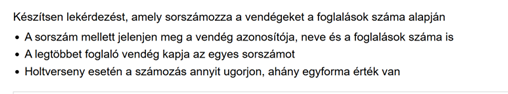

In [ ]:
select usernev, nev, COUNT(*) AS 'foglalas szama', RANK() OVER (ORDER BY COUNT(*) DESC) as 'rank'
FROM Vendeg v JOIN Foglalas f ON v.USERNEV = f.UGYFEL_FK
group by usernev, nev


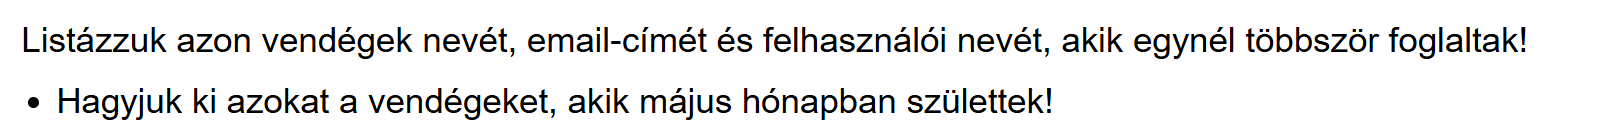

In [ ]:
select nev, email, usernev 
from vendeg v join foglalas f on v.USERNEV=f.UGYFEL_FK
where usernev NOT IN (select USERNEV
from Vendeg
where MONTH(SZUL_DAT)=5)
group by usernev, nev, EMAIL
having count(*)>1

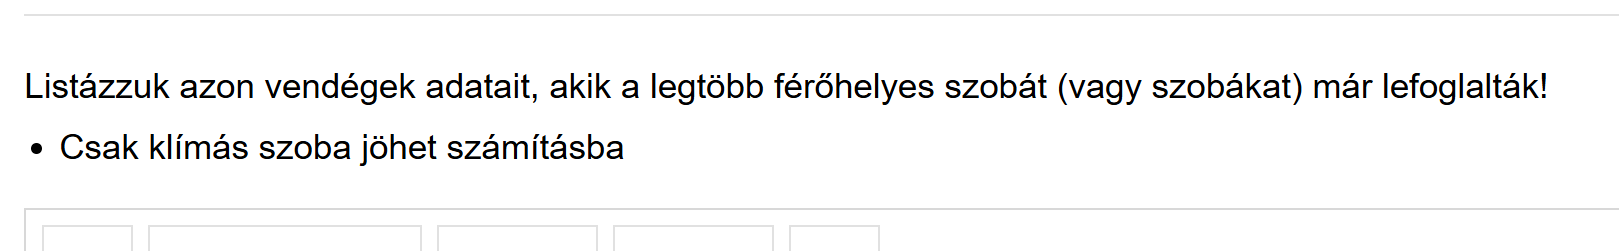

In [27]:
select *
from vendeg v join foglalas f on v.USERNEV=f.UGYFEL_FK JOIN Szoba sz ON f.SZOBA_FK = sz.SZOBA_ID 
where sz.ferohely IN (select MAX(ferohely)
from Szoba
where klimas='I')

(3 rows affected)

Total execution time: 00:00:00.050

USERNEV,NEV,EMAIL,SZAML_CIM,SZUL_DAT,FOGLALAS_PK,UGYFEL_FK,SZOBA_FK,METTOL,MEDDIG,FELNOTT_SZAM,GYERMEK_SZAM,SZOBA_ID,SZOBA_SZAMA,FEROHELY,POTAGY,KLIMAS,SZALLAS_FK
JOZSEFG,Gyuris József,józsef.gyuris@mail.hu,2660 Balassagyarmat Petőfi utca 1/2.,1975-05-26,852,JOZSEFG,24,2016-05-23,2016-05-25,1,0,24,8,4,1,i,3
PETERB,Berendi Péter,péter.berendi@mail.hu,3980 Sátoraljaújhely Vasút utca 4/10.,1969-01-01,1167,PETERB,24,2016-10-19,2016-10-20,3,1,24,8,4,1,i,3
tunde,Turcsik Tünde,tunde@gmail.com,7130 Tolna Fő út 122.,1974-02-12,1415,tunde,24,2017-01-03,2017-01-06,4,1,24,8,4,1,i,3


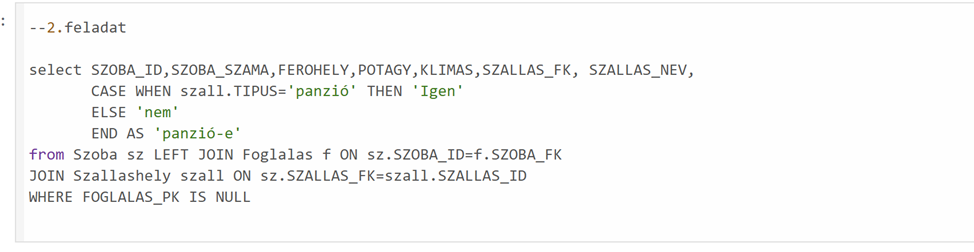

„Listázd ki azokat a szobákat, amelyeket még nem foglaltak le.”

REDIS

kulcs létrehozása, módosítás majd kiolvasás

SET user:name "Kiss Anna"

SET user:city "Budapest"

SET user:city "Szeged"

GET user:city

  

<span style="color: rgb(226, 229, 233); font-family: &quot;Segoe UI Historic&quot;, &quot;Segoe UI&quot;, Helvetica, Arial, sans-serif; font-size: 15px; white-space-collapse: preserve;"><b>A RedisInsight-ban modellezd a users és orders relációs táblák Redis megfelelőjét kulcs-alapú hash struktúrával!</b></span>

<span style="font-size: 15px; white-space-collapse: preserve;"><b>HSET user:1 id 1 name "Kiss Anna" email "anna@example.com" HSET user:2 id 2 name "Szabó Péter" email "peter@example.com"</b></span>

<span style="font-size: 15px; white-space-collapse: preserve;"><b>HSET order:1 id 1 product "Laptop" amount 1 user_id 1 HSET order:2 id 2 product "Egér" amount 2 user_id 1 HSET order:3 id 3 product "Monitor" amount 1 user_id 2</b></span>

<span style="color: rgb(226, 229, 233); font-family: &quot;Segoe UI Historic&quot;, &quot;Segoe UI&quot;, Helvetica, Arial, sans-serif; font-size: 15px; white-space-collapse: preserve;"><b><br></b></span>